# Generalities for GANs

* Import libraries
* Run on GPU if possible
* Create data loaders

In [89]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from IPython.display import Image, display
import matplotlib.pyplot as plt

# create directory to save results
!mkdir results

# script parameters
batch_size = 128
log_interval = 100

# run on GPU if possible
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# create data loaders
kwargs = {'num_workers': 1, 'pin_memory': True} if cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.ToTensor()),
    batch_size=batch_size, shuffle=True, **kwargs)

mkdir: cannot create directory ‘results’: File exists


# Neural Network class

* Generator
* Discriminator


In [90]:
# Generator Network
class Generator(nn.Module):

    # declare layers
    def __init__(self):
        super(Generator, self).__init__()

        # dummy assignment until this function is filled in
        # self.fc1 = nn.Linear(1, 1)
        self.fc1 = nn.Linear(20, 400)
        self.fc2 = nn.Linear(400, 784)


    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 784 nodes
    def forward(self, x):

        # dummy assignment until this function is filled in
        # probabilities = torch.rand(z.shape[0],784).to(device)
        h1 = F.relu(self.fc1(x.view(-1, 20)))
        h2 = F.sigmoid(self.fc2(h1))
        return h2

# Discriminator Network
class Discriminator(nn.Module):

    # declare layers
    def __init__(self):
        super(Discriminator, self).__init__()

        # dummy assignment until this function is filled in
        self.fc1 = nn.Linear(784, 400)
        self.fc2 = nn.Linear(400, 1)

    # Forward: one ReLU hidden layer of 400 nodes, one Sigmoid output layer of 1 node
    def forward(self, x):

        # dummy assignment until this function is filled in
        h1 = F.relu(self.fc1(x.view(-1, 784)))
        h2 = F.sigmoid(self.fc2(h1))
        return h2

# Loss Function

In [91]:
# GAN Loss Function
#
# Inputs:
#    predictions: array of probabilities indicating whether the images are real or fake 
#    targets: array of 1s (real image) and 0s (fake image)
#
# Output:
#    BCE: binary cross entropy (scalar)
#
def gan_loss_function(predictions, targets):

    # dummy assignment until this function is filled in
    BCE = F.binary_cross_entropy(predictions, targets, reduction='sum')
    return BCE

# Training

In [95]:
# GAN Training
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html

# Inputs:
#    epoch: epoch #
#    generator: generator network
#    generator_optimizer: generator optimizer
#    discriminator: discriminator network
#    discriminator_optimizer: discriminator optimizer
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_train(epoch, generator, generator_optimizer, discriminator, discriminator_optimizer):

    # dummy assignment until this function is filled in
    # average_discriminator_loss = 0
    # average_generator_loss = 0
    # return average_generator_loss, average_discriminator_loss
    # Lists to keep track of progress

    # For each batch in the train_loader
    for batch_idx, (data, _) in enumerate(train_loader):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        data = data.to(device)
        current_batch_size = data.size(0)
        ## Train with all-real batch
        discriminator_optimizer.zero_grad()

        # data has shape [128, 1, 28, 28]
        # Create a vector of ones as real labels, use [128,1] to match the D output size  
        real_labels = torch.ones((current_batch_size, 1), device=device)
        # Forward pass real batch through D
        D_real_predictions = discriminator(data)
        # Calculate loss on all-real batch
        # print(D_real_predictions.shape)
        # print(real_labels.shape)
        errD_real = gan_loss_function(D_real_predictions, real_labels)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_real_predictions_avg = D_real_predictions.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(current_batch_size, 20, 1, 1, device=device)
        # Generate fake image batch with G
        fake_images = generator(noise)
        fake_labels = torch.zeros((current_batch_size, 1), device=device)
        # Classify all fake batch with D
        D_fake_predictions = discriminator(fake_images.detach())
        # Calculate D's loss on the all-fake batch
        errD_fake = gan_loss_function(D_fake_predictions, fake_labels)
        # Calculate the gradients for this batch
        errD_fake.backward()
        D_fake_predictions_avg = D_fake_predictions.mean().item()
        # Add the gradients from the all-real and all-fake batches
        errD = errD_real + errD_fake
        # Update D
        discriminator_optimizer.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        generator_optimizer.zero_grad()
        # Since we just updated D, perform another forward pass of all-fake batch through D
        G_D_fake_predictions = discriminator(fake_images)
        real_labels = torch.ones((current_batch_size, 1), device=device)
        # Calculate G's loss based on this output
        errG = gan_loss_function(G_D_fake_predictions, real_labels)
        # Calculate gradients for G
        errG.backward()
        G_fake_predictions_avg = G_D_fake_predictions.mean().item()
        # Update G
        generator_optimizer.step()

    return errG, errD



# Testing


In [96]:
# GAN Test
#
# Have a look at the following tutorial: https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
#
# Inputs:
#    epoch: epoch #
#    generator: generator network
#    discriminator: discriminator network
#
# Outputs:
#    average_generator_loss: binary cross entropy (scalar)
#    average_discriminator_loss: binary cross entropy (scalar)
#
def gan_test(epoch, generator, discriminator):

    # dummy assignment until this function is filled in
    # average_generator_loss = 0
    # average_discriminator_loss = 0
    # return average_generator_loss, average_discriminator_loss

    # For each batch in the train_loader
    for batch_idx, (data, _) in enumerate(test_loader):

        ############################
        # Test the discriminator on real and fake images
        ###########################
        data = data.to(device)
        current_batch_size = data.size(0)
      
        # data has shape [128, 1, 28, 28]
        # Create a vector of ones as real labels, use [128,1] to match the D output size  
        real_labels = torch.ones((current_batch_size, 1), device=device)
        # Forward pass real batch through D
        D_real_predictions = discriminator(data)
        # Calculate loss on all-real batch
        # print(D_real_predictions.shape)
        # print(real_labels.shape)
        errD_real = gan_loss_function(D_real_predictions, real_labels)
        D_real_predictions_avg = D_real_predictions.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        noise = torch.randn(current_batch_size, 20, 1, 1, device=device)
        # Generate fake image batch with G
        fake_images = generator(noise)
        fake_labels = torch.zeros((current_batch_size, 1), device=device)
        # Classify all fake batch with D
        D_fake_predictions = discriminator(fake_images.detach())
        # Calculate D's loss on the all-fake batch
        errD_fake = gan_loss_function(D_fake_predictions, fake_labels)
        # Calculate the gradients for this batch
        D_fake_predictions_avg = D_fake_predictions.mean().item()

        # Add the losses from the all-real and all-fake batches
        errD = errD_real + errD_fake

        ############################
        # Test the generator
        ###########################
        # Since we just updated D, perform another forward pass of all-fake batch through D
        G_D_fake_predictions = discriminator(fake_images)
        real_labels = torch.ones((current_batch_size, 1), device=device)
        # Calculate G's loss based on this output
        errG = gan_loss_function(G_D_fake_predictions, real_labels)
        # Calculate loss for G
        G_fake_predictions_avg = G_D_fake_predictions.mean().item()

    return errG, errD

# Main

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Sample of generated images after epoch 1


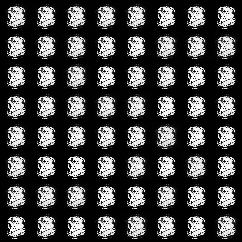



Sample of generated images after epoch 2


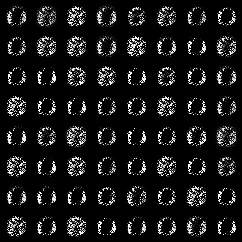



Sample of generated images after epoch 3


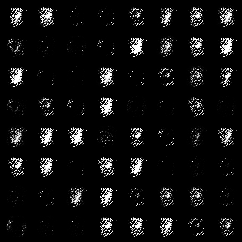



Sample of generated images after epoch 4


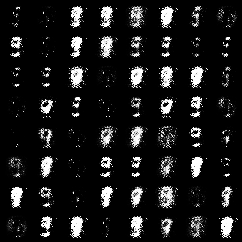



Sample of generated images after epoch 5


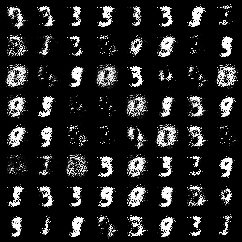

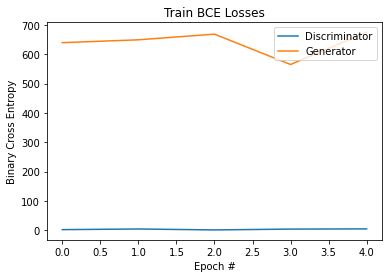

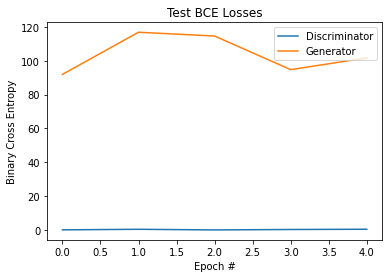

In [99]:
# train and test gan
epochs = 50
discriminator_average_train_losses = []
discriminator_average_test_losses = []
generator_average_train_losses = []
generator_average_test_losses = []
generator_model = Generator().to(device)
generator_optimizer = optim.Adam(generator_model.parameters(), lr=1e-3)
discriminator_model = Discriminator().to(device)
discriminator_optimizer = optim.Adam(discriminator_model.parameters(), lr=1e-3)
for epoch in range(1, epochs + 1):
    generator_average_train_loss, discriminator_average_train_loss = gan_train(epoch, generator_model, generator_optimizer, discriminator_model, discriminator_optimizer)
    discriminator_average_train_losses.append(discriminator_average_train_loss)
    generator_average_train_losses.append(generator_average_train_loss)
    generator_average_test_loss, discriminator_average_test_loss = gan_test(epoch, generator_model, discriminator_model)
    discriminator_average_test_losses.append(discriminator_average_test_loss)
    generator_average_test_losses.append(generator_average_test_loss)
    with torch.no_grad():
        sample = torch.randn(64, 20).to(device)
        sample = generator_model(sample).cpu()
        save_image(sample.view(64, 1, 28, 28),
                   'results/sample_' + str(epoch) + '.png')
        print('Sample of generated images after epoch ' + str(epoch))
        display(Image('results/sample_' + str(epoch) + '.png'))
        print('\n')

# Plot Train losses
plt.plot(discriminator_average_train_losses)
plt.plot(generator_average_train_losses)
plt.title('Train BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()

# Plot Test Losses
plt.plot(discriminator_average_test_losses)
plt.plot(generator_average_test_losses)
plt.title('Test BCE Losses')
plt.ylabel('Binary Cross Entropy')
plt.xlabel('Epoch #')
plt.legend(['Discriminator','Generator'], loc='upper right')
plt.show()
